# 타이타닉 데이터 분석

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train = pd.read_csv("C:/Users/jungh/Downloads/타이타닉/train.csv")
test = pd.read_csv("C:/Users/jungh/Downloads/타이타닉/test.csv")

In [2]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('S',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [3]:
transform_features(train)
transform_features(test)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,34.50000,0,0,7.8292,7,1
1,3,0,47.00000,1,0,7.0000,7,2
2,2,1,62.00000,0,0,9.6875,7,1
3,3,1,27.00000,0,0,8.6625,7,2
4,3,0,22.00000,1,1,12.2875,7,2
...,...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,7,2
414,1,0,39.00000,0,0,108.9000,2,0
415,3,1,38.50000,0,0,7.2500,7,2
416,3,1,30.27259,0,0,8.0500,7,2


In [4]:
train.astype(float).corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.295113,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.742093,0.162098
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.118635,0.108262
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.249098,-0.026749
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.041058,0.068230
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,-0.031553,0.039798
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.525742,-0.224719
Cabin,-0.295113,0.742093,0.118635,-0.249098,0.041058,-0.031553,-0.525742,1.000000,0.199444
Embarked,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,0.199444,1.000000


<AxesSubplot:title={'center':'Pearson Correalation of Features'}>

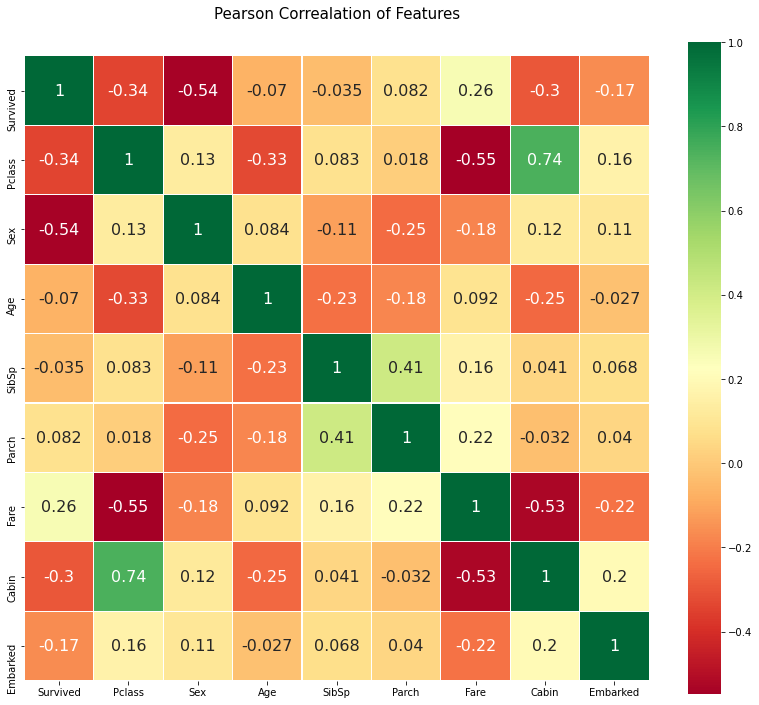

In [5]:
plt.figure(figsize=(14,12))
plt.title('Pearson Correalation of Features', y=1.05, size = 15)
sns.heatmap(train.astype(float).corr(), annot = True, cmap='RdYlGn', linewidths=0.1, vmax=1.0, square = True, annot_kws={'size':16})

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [14]:
y_titanic_df = train['Survived']
X_titanic_df= train.drop('Survived',axis=1)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)

In [18]:
# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8492


C:\Users\jungh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:

from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 
# exec_kfold 호출
exec_kfold(dt_clf , folds=5)


교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [25]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df , y_titanic_df , cv=5)
for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


In [26]:

from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


In [32]:
!pip install autogluon.tabular[all] -q --progress-bar off > /dev/null 2>&1

지정된 경로를 찾을 수 없습니다.


In [33]:
from timeit import default_timer as timer
import pandas as pd
import numpy as np
from IPython.display import HTML
import logging

random_state=999

In [34]:
max_features_list = ['sqrt', 'log2', 0.25, 0.5, 0.75]
n_neighbors_list = [4 ** i for i in range(1, 4)]
hyperparameters = {
    'GBM': [
        {'extra_trees': True, 'seed': random_state, 'ag_args': {'name_suffix': 'XT'}},
        {},
        'GBMLarge',
    ],
    'RF': [
        {'criterion': 'gini', 'random_state': random_state, 'max_features': max_features, 'n_estimators': 500,
         'ag_args': {'name_suffix': f'Gini_{str(max_features)}', 'problem_types': ['binary', 'multiclass']}}
        for max_features in max_features_list
    ] + [
        {'criterion': 'entropy', 'random_state': random_state, 'max_features': max_features, 'n_estimators': 500,
         'ag_args': {'name_suffix': f'Entr_{str(max_features)}', 'problem_types': ['binary', 'multiclass']}}
        for max_features in max_features_list
    ],
    'KNN': [
        {'weights': 'uniform', 'n_neighbors': n_neighbors, 'ag_args': {'name_suffix': f'Unif_{n_neighbors}'},
         'ag_args_fit': {'use_daal': False}}
        for n_neighbors in n_neighbors_list
    ] + [
        {'weights': 'distance', 'n_neighbors': n_neighbors, 'ag_args': {'name_suffix': f'Dist_{n_neighbors}'},
         'ag_args_fit': {'use_daal': False}}
        for n_neighbors in n_neighbors_list
    ]
}

In [ ]:
from autogluon.tabular import TabularPredictor

t0 = timer()
autogluon_predictor = TabularPredictor(
    label=label,
    eval_metric="accuracy",
    learner_kwargs={'ignored_columns': [id_column]}
).fit(
    train_data=train_data,
    verbosity=2,
    presets='best_quality',
    hyperparameters=hyperparameters
)
t1 = timer()
default_leaderboard = autogluon_predictor.leaderboard(valid_data)
t2 = timer()

default_ag_fitting_time = t1 - t0
default_ag_evaluation_time = t2 - t1